<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Alison Ostlund

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

$$ P(r_5) =  P(r_5 | F)P(F) + P(r_5 | S)P(S) + P(r_5| T) P(T) $$ <br>
$$ P(r_5) =  (\frac{0}{4} \cdot \frac{28}{40}) + (\frac{1}{6} \cdot \frac{10}{40}) + (\frac{1}{20} \cdot \frac{2}{40})$$ <br>
$$ P(r_5) =  (0) + (\frac{1}{24}) + ( \frac{1}{400})$$ <br>
$$ P(r_5) = \frac{53}{1200} \approx \textbf{0.04416} $$




**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

$$ P(S|r_5) = \frac{P(r_5 | S) P(S)}{P(r_5)} $$ <br>
$$ P(S|r_5) = \frac{(\frac{1}{6} \cdot \frac{10}{40})}{\frac{53}{1200}} $$ <br>
$$ P(S|r_5) = \frac{50}{53} \approx \textbf{0.9434} $$ <br>

**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

Event $R_5$ is said to be independent of event S if P( $R_5$ | S) = P($R_5$): <br>
<br>
$$P(R_5 | S) = \frac{1}{6} $$ <br>
$$ P(R_5) = \frac{53}{1200} $$ <br>
$$ \textbf{P($R_5$ | S) $\neq$ P($R_5$)} $$ <br>
Therefore the events $R_5$ and S are not independent making them dependent.


**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.


$$P(F|E_1) = \frac{P(E_1 | F) \cdot P(F)}{P(E_1)} $$<br>

$$P(E_1| F) = 1 $$<br>
$$ P(F) = \frac{28}{40}$$ <br>
The $P(E_1)$ is the only unknown value we have.<br>
$$P(E_1) = P(r1) + P(r2) + P(r3) + P(r4) $$
        $$= 4 \cdot(P(r1)) $$
SO... $P(r_1) = P(r_1 | F)P(F) + P(r_1 | S)P(S) + P(r_1| T) P(T) $ <br>
$$ = (\frac{1}{4} \cdot \frac{28}{40}) + (\frac{1}{6} \cdot \frac{10}{40}) + (\frac{1}{20} \cdot \frac{2}{40})$$ <br> 
$$ = \frac{263}{1200} $$<br>
$$P(E_1) = 4 \cdot(\frac{263}{1200})  = \frac{263}{300} $$<br>

Then $P(F|E_1)$ =
$$\frac{ 1 \cdot \frac{28}{40}}{\frac{263}{300}} = \frac{210}{263} \approx \textbf{0.7684} $$ 
        



**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part C**.

The case of rolling $E_1$ gives us the options of getting a set of {1,2,3,4}. <br>
So the the set for $E_2$ is {11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44}. <br>
From here you can see the number of chances of rolling increases exponetially, therefore to get the $P(F|E_n)$ the prob $P(E_n)$ is just $P(E_1)^{n} = \frac{263}{400}^{n}$. <br>


In [217]:
def prob_four(n):
    pE = pow((263/300),n)
    prob = (28/40) /pE
    return prob

prob_four(1)
    

0.7984790874524714

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

The smallest value of n rolls that gives a better then 95% chance of getting a Four-sided die is 3.
When n=3 $\rightarrow P(F|E_3)$ = 1.03894978777664 > 0.95.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

$$ P(L) = P (L | G) P(G) + P(L| C) P(C) + P(L| R) P(R) $$<br>
$$ P(L) = \frac{1}{4}\cdot \frac{1}{4} + \frac{1}{4}\cdot \frac{1}{3} + \frac{1}{4}\cdot 0 $$<br>
$$ P(L) =  \frac{1}{16} + \frac{1}{12} $$<br>
$$ P(L) = \textbf{$\frac{7}{48}$} \approx \textbf{0.145} $$

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

$$P(G) = P(G|G) + P(G|E) P(E) $$ <br>
$$P(G) = \frac{1}{2} + \frac{1}{2}\cdot \frac{1}{4} $$<br>
$$ P(G) =  \frac{1}{2} + \frac{1}{8} $$<br>
$$ P(G) = \textbf{$\frac{5}{8}$}\approx \textbf{0.625} $$


**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

$\textbf{1.}$ <br>
Both Oscar and Stella have the Gym, Library, and Coffee as a common stop where they could run into eachother. <br>
Oscar:  <br>
P(G) = $\frac{1}{4}$ 
P(L) = $\frac{1}{4}$ 
P(C) = $\frac{1}{4}$ <br>
Stella: <br>
P(G) = $\frac{1}{3}$ 
P(L) = $\frac{1}{3}$ 
P(C) = $\frac{1}{3}$ 
<br>
So probability both Oscar and Stella end up a the Gym is : $\frac{1}{4} \cdot \frac{1}{3} = \frac{1}{12} $ Which would be the same for if the both go the the Library, or the Coffee. Therefore the probability that they end up at the same place is $ (3 \cdot \frac{1}{12})  = \frac{1}{4} \approx \textbf{0.25}$ <br>

$\textbf{2.}$ <br>
For Oscar and Stella to run into eachother after taking two stops we need to consider the paths each one can take an then find the probabilities for both.
<br>
Oscars paths are: <br>
$E: E \to R \to E,E \to C \to E, E \to L \to E, E \to G \to E $<br>
$L: E \to C \to L,E \to G \to L$<br>
$R:E \to G \to R$<br>
$H: E \to L \to H, E \to C \to H, E \to G \to H$<br>
$C: E \to L \to C$<br>
$G: E \to L \to G, E \to R \to G $<br>


We find the Probabilities for each location for Oscar: <br>

$$P(E) = P(E|R) P(R) + P(E|C) P(C) + P(E|L) P(L)  + P(E|G) P(G)$$ <br>
$$ = \frac{1}{4}\cdot\frac{1}{2}+ \frac{1}{4}\cdot\frac{1}{3} + \frac{1}{4}\cdot\frac{1}{4} + \frac{1}{4}\cdot\frac{1}{4} = \frac{1}{3}$$ <br>
$$P(L) = P(L|C) P(C) + P(L|G) P(G) $$ <br>
$$ = \frac{1}{4}\cdot\frac{1}{3}+ \frac{1}{4}\cdot\frac{1}{4}= \frac{7}{48}$$ <br>
$$P(R) = P(R|G) P(G) $$ <br>
$$ = \frac{1}{4}\cdot\frac{1}{4}= \frac{1}{16}$$ <br>
$$P(H) = P(H|L) P(L) + P(H|C) P(C) + P(H|G) P(G)  $$ <br>
$$ = \frac{1}{4}\cdot\frac{1}{4}+ \frac{1}{4}\cdot\frac{1}{3} + \frac{1}{4}\cdot\frac{1}{4}  = \frac{5}{24}$$ <br>
$$P(C) = P(C|G) P(G) $$ <br>
$$ = \frac{1}{4}\cdot\frac{1}{4}= \frac{1}{16}$$ <br>
$$P(G) = P(G|L) P(L) + P(G|R) P(R) $$ <br>
$$ = \frac{1}{4}\cdot\frac{1}{4}+ \frac{1}{4}\cdot\frac{1}{2}= \frac{3}{16}$$ <br>


Stellas paths are:<br>
$E: H \to L \to E, H \to G \to E,  H \to C \to E$<br>
$L: H \to G \to L, H \to C \to L$<br>
$R: H \to G \to R$<br>
$H: H \to L \to H, H \to G \to H, H \to C \to H$<br>
$C: H \to L \to C$<br>
$G: H \to L \to G $<br>



Calulate the probabilities for each location for Stella:<br>

$$P(E) = P(E|L) P(L) + P(E|G) P(G) + P(E|C) P(C)$$<br>
$$ = \frac{1}{3}\cdot\frac{1}{4}+ \frac{1}{3}\cdot\frac{1}{4} + \frac{1}{3}\cdot\frac{1}{3} = \frac{5}{18}$$<br>
$$P(L) = P(L|G) P(G) + P(L|C) P(C) $$<br>
$$ = \frac{1}{3}\cdot\frac{1}{4}+ \frac{1}{3}\cdot\frac{1}{3}= \frac{7}{36}$$<br>
$$P(R) = P(R|G) P(G) $$<br>
$$ = \frac{1}{3}\cdot\frac{1}{4}= \frac{1}{12}$$<br>
$$P(H) = P(H|L) P(L) + P(H|G) P(G) + P(H|C) P(C)  $$<br>
$$ = \frac{1}{3}\cdot\frac{1}{4}+ \frac{1}{3}\cdot\frac{1}{4} + \frac{1}{3}\cdot\frac{1}{3}  = \frac{5}{18}$$<br>
$$P(C) = P(C|L) P(L) $$<br>
$$ = \frac{1}{3}\cdot\frac{1}{4}= \frac{1}{12}$$<br>
$$P(G) = P(G|L) P(L) $$<br>
$$ = \frac{1}{3}\cdot\frac{1}{4}= \frac{1}{12}$$<br>

So then the probability of them meeting is: 
Notation: subscript o = Oscar, subscript s = Stella. <br>
$$\begin{align}
P(meet) &= P(E_0)P(E_s) + P(L_o)P(L_s) + P(R_o)P(R_s) + P(H_o)P(H_s) + P(C_o)P(C_s) + P(G_o)P(G_s) \\
&= \frac{1}{3} \cdot\frac{5}{18} + \frac{7}{48}\cdot\frac{7}{36} + \frac{1}{16}\cdot\frac{1}{12} + \frac{5}{24}\cdot\frac{5}{18} + \frac{1}{16}\cdot\frac{1}{12} + \frac{3}{16}\cdot\frac{1}{12}\\
&= \frac{5}{54} + \frac{49}{1728} + \frac{1}{192} + \frac{25}{432} + \frac{1}{192} +\frac{1}{64}\\
&= \frac{59}{288} \approx  \textbf{0.2048}
\end{align}$$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [218]:
graph={"E":["R","G","L","C"],  # neighbors of E
         "R":["G","E"],  # neighbors of R
         "L":["G","E","C", "H"], # neighbors of L
         "G":["R","E","L","H"], # neighbors of G
         "H":["G","L","C"],# neighbors of H
         "C":["L","H", "E"]}# neighbors of C

def simulation(l, steps, neighbors):
    location = l
    for s in range(steps):
        location = np.random.choice(neighbors[location])
    return location

#PART A
num = 10000
arr = []
for i in range(num):
    j = simulation("E",2,graph)
    if(j == "L"):
        arr.append(j)
print(len(arr)/num)

0.1407


In [219]:
#PART B
arrb = []
arrb1 = []
for i in range(num):
    j = simulation("R",2,graph)
    if(j == "G"):
        arrb.append(j)
b1 = (len(arrb)/num)

for i in range(num):
    k = simulation("R",1,graph)
    if(k == "G"):
        arrb1.append(k)
b2 = (len(arrb1)/num)
print(b1+b2)

0.6338999999999999


In [220]:
#PART C
#1
arro = []
for i in range(num):
    o = simulation("E",1,graph)
    s = simulation("H",1,graph)
    if(o == s):
        arro.append(o)
meet = (len(arro)/num)
print(meet)
# Oscar = np.array([simulation("E",1,graph) for x in range(num)])
# Stella = np.array([simulation("H",1,graph) for x in range(num)])
# print(np.sum(Oscar==Stella)/num)

#2
arrs = []
for i in range(num):
    o = simulation("E",2,graph)
    s = simulation("H",2,graph)
    if(o == s):
        arrs.append(o)
meet1 = (len(arrs)/num)
print(meet1)


0.2458
0.2001


***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

$$ \Omega = \{HM,MH, HHMH, HHHM, HHHHHM, HHHHMH...\} $$

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

$$ P(T |E) = \frac{P(T \cap E)}{P(E)} $$ <br>
$$= \frac{p(1-q)}{p(1-q)+(q(1-p))}$$<br>
$$= \frac{p(1-q)}{p-pq+q-qp} $$<br>
$$= \frac{p(1-q)}{p+q -2pq}$$

**Part C**: Explain why events $W$ and $T$ are independent. 

Events W and T are indpendent of eachother because all hits are indpendent of each other.Therefore Tony has just as good a chance of winning any round as he does in the first round. Making it past the first round has no impact on the probability of Tony winning, and Tony is equally likely to win in any round as the first.

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) ~P(T \mid C)$. 

$$P(T)= P(T|C)\cdot P(T) + P(T|E) \cdot P(E) $$ <br>
$$ =P(T|C) \cdot P(T) +\frac{P(T \cap E) \cdot P(E)}{P(E)}  $$ <br>
$$ =P(T|C) \cdot P(T) + P(T \cap E) $$ <br>
$$ =P(T|C)(pq + (1-p)\cdot(1-q) + p(1-q)$$ <br>
$$ =(2pq-p-q+1)\cdot P(T|C) + p(1-q)$$

**Part E**: Use the fact from **Part B** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

$$P(T) = P(T|C)(2pq -p-q +1) + p(1-q) $$<br>
$$p(1-q) = P(T) - P(T| C)(2pq - p - q + 1) $$<br>

Since $P(T| C) = P(T)$<br>
$$ p(1-q) = P(T) - P(T)(2pq - p - q + 1) $$<br>
$$ p(1-q) = P(T)(1-1(2pq - p - q + 1)) $$<br>
$$ P(T)= \frac{p(1-q)}{1-1(2pq - p - q + 1)} $$<br>
$$ P(T) = \frac{p(1-q)}{1-2pq + p + q - 1} $$<br>
$$ P(T) = \frac{p(1-q)}{p + q - 2pq} $$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

Part B and Part E are the same because these events are independent. Event T is indpendent of event C and is also independent of event E. So if there is no winner in the first round, then the whole round restarts. The new round has no prior knowledge of the previous round, therefore Tony ha the same probability of winning in this new round as he did in the first round. Further, ending in the first round has no impact on Tony winning, nor does Tony winning have any influence on the game ending in the first round.

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

The significance of the solution technique for P(T) is the fact that it proved the independence of Tony winning from events T and C. This showed that whether both Tony or Dan scored or neither scored in the first round, Tony had an equal chance of winning afterward. 
We can only use this technique because of the independence of events and therefore this method wouldn't have worked otherwise.

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [221]:
def miniopoly_turn(state, cash):
   #initialize die
    dice = [1,2,3,4,5,6]
    #roll die
    die1 = np.random.choice(dice)
    die2 = np.random.choice(dice)  
#broke
    if cash < 0:
        cash = 0
        return state,cash 
    #in jail
    if state == 30:
        if(die1 == die2):
            state = 10 + die1 + die2
        else:
            cash = cash - 20
            if cash < 0:
                cash = 0
            return state, cash 
    else:
        state = state + die1 + die2
         
    #pass GO
    if state >= 40:
        cash = cash + 200
        state = state - 40
    #go to jail
    if state==30:
        return state, cash     
    #card squares
    if state == 2 or state == 7 or state == 17 or state == 22 or state == 33 or state == 36:
        card = np.random.choice([50,100,200,-50,-100])
        cash = cash + card
        return state,cash
    #do nothing squares
    if state == 0 or state == 10 or state == 20:
        return state, cash
    #other squares
    else:
        cash = cash - state
        return state, cash
    
    return state, cash
    



**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

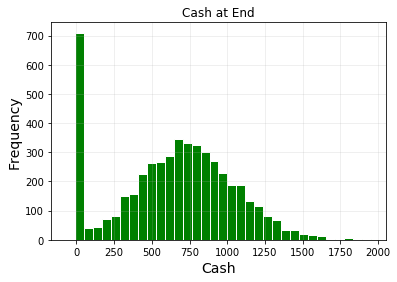

In [231]:
finalCash=[]
def play():
    for game in range(5000):
        state = 0
        cash = 200
        for turn in range(30):
            state,cash = miniopoly_turn(state,cash)
            if cash == 0:
                break
        finalCash.append(cash)
      
    
play()
#plot histogram
plt.hist(finalCash,facecolor="green", edgecolor="white", bins = "auto")
plt.xlabel("Cash", fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.title("Cash at End")
plt.grid(alpha=0.25)



**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [232]:
def bankrupt():
    count = 0
    for i in range (5000):
        if finalCash[i] <= 0:
            count = count + 1
    
    print("Probability a player goes bankrupt in first 30 turns: {}".format(count/5000))
    
    
bankrupt()

Probability a player goes bankrupt in first 30 turns: 0.1372


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [224]:
money=[]
visits=[]
def jail():
    for i in range (5000):
        state = 0
        cash = 200
        jail = 0
        for turn in range(30):
            state,cash = miniopoly_turn(state,cash)
            if state == 30:
                jail = 1
            if cash == 0:
                break
        money.append(cash)
        visits.append(jail)

def calcProb():
    count = 0
    broke = 0
    vjail = 0
    for i in range (5000):
        if money[i] == 0:
            broke +=1
        if visits[i] == 1:
            vjail +=1
        if moeny[i] == 0 and visits[i] == 1:
            count += 1
    
    jail_broke = count/5000
    Bankrupt = broke/5000
    Jail = vjail/5000
    print("Probability bankrupt given jail: {}".format((jail_broke/Jail)))
    return jail_broke/Bankrupt
    

jail()
partE = calculate_prob()

The probability a player goes bankrupt in the first 30 turns given that they've been to jail is 0.21229476899579988


A player is more likely to go bankrupt if theyve been to jail. The probability of a player going broke is less than them going broke given that they've gone to jail. 

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [233]:
print("Probability gone to jail given bankrupt: {}".format(partE))


Probability gone to jail given bankrupt: 0.7443105756358768


***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


$D_1$ = roll dice one, $D_2$ = roll dice 2 <br>
The probability of the two rolls being equal or differ by one can be denoted by $P(D_1 \cap D_2)$
SO then for each case of rolling a 1 through 6 we can calculate the equation:
$$ P( D_1 = 1\cap  D_2) + P( D_1 = 2 \cap  D_2) + P( D_1 = 3 \cap  D_2) .....+ P( D_1 = 6 \cap  D_2)$$ 
The probabilty for $D_1$ will always equal $\frac{1}{6}$ but the value of $D_2$ will vary since when you roll a 1 or 6 there is only 2 possibilities for dice two, ex: Die1 = 1 then Die2 can = 1,2. Then the rest of the rolls (2 -5) will have 3 possibilities.<br>
SO plugging in the numbers..
$$ P(D_1 \cap D_2) = 2 \cdot (\frac{1}{6} \cdot \frac{2}{6}) + 4 \cdot (\frac{1}{6} \cdot \frac{3}{6}) $$<br>
$$ = \frac{1}{9}+ \frac{1}{3} $$<br>
$$ = \frac{4}{9} = 0.444$$

    


**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [228]:
def rolltrial(trials):
    sides = [1,2,3,4,5,6]
    match = 0
        #roll die
    for roll in range(trials):
        die1 = np.random.choice(sides)
        die2 = np.random.choice(sides)
        if(die1 == die2):
            match = match + 1
        if(die1 +1 == die2):
            match = match + 1
        if(die1 -1 == die2):
            match = match + 1
    
    return (match/trials)
 

print("Value of P(C): {}".format(rolltrial(10000)))
        
        

Value of P(C): 0.4477


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

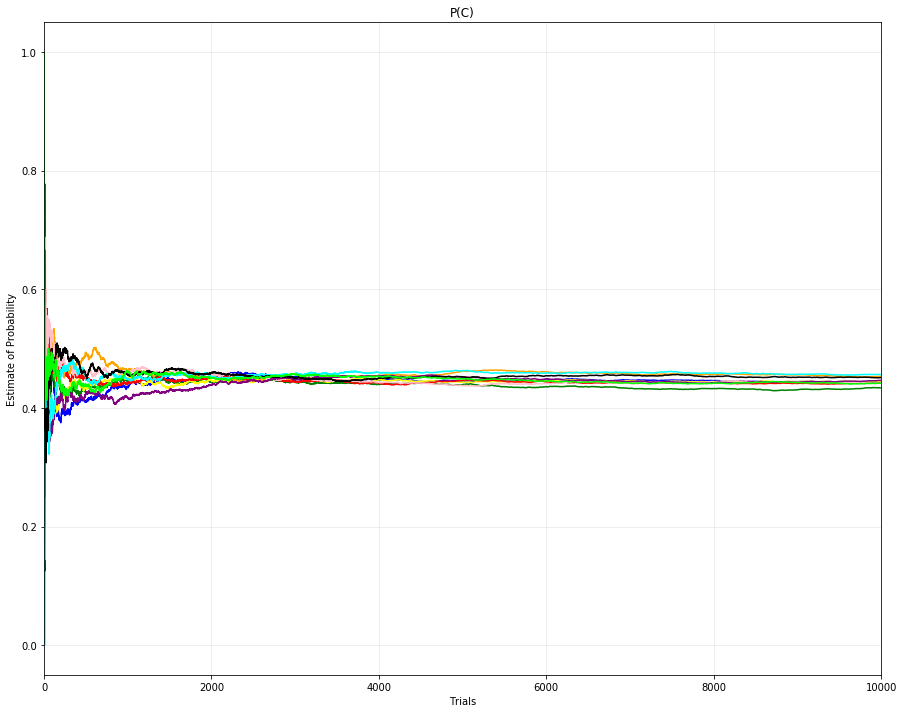

In [230]:
sides = [1,2,3,4,5,6]
trials = 50000
def dieSim():
    p1 = np.zeros(trials)
    p2 = np.zeros(trials)
    for ii in range(trials):
        die1 = np.random.choice(sides)
        die2 = np.random.choice(sides)
        if (die1==die2):
            p1[ii] = 1
        elif (die1+1==die2):
            p1[ii] = 1
        elif (die1-1 == die2):
            p1[ii] = 1
    for jj in range(trials):
        p2[jj] = np.sum(p1[:jj+1] == 1) / len(p1[:jj+1])
    #print(p1.sum()/trials)
    return p2

plots = 10
fig, ax = plt.subplots(figsize = (15,12))
plt.xlim(0,10000)
ax.plot(dieSim(), label = "1st", color='blue')
ax.plot(dieSim(), label = "2nd",  color='green')
ax.plot(dieSim(), label = "3rd", color='yellow')
ax.plot(dieSim(), label = "4th", color='orange')
ax.plot(dieSim(), label = "5th", color='red')
ax.plot(dieSim(), label = "6th", color='pink')
ax.plot(dieSim(), label = "7th", color='purple')
ax.plot(dieSim(), label = "8th", color='cyan')
ax.plot(dieSim(), label = "9th", color='black')
ax.plot(dieSim(), label = "10th", color='lime')


ax.set_title("P(C)")
ax.set_xlabel("Trials")
ax.set_ylabel("Estimate of Probability")
ax.grid(True, alpha = .25)
    

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

As the number of trials increases the data becomes closer together for each simulation. This means the precent error decreases as the number of trials increases. 

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)

 


$$
\begin{bmatrix} 
    \cos{45} \\     
    -\sin{45}\\      
      0 \\   
\end{bmatrix}
\cdot
\begin{bmatrix} 
    \sin{45} \\     
    \cos{45}\\      
      0 \\   
\end{bmatrix}
= \cos{\theta}
$$<br>
$$\frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2}}{2} + \frac{-\sqrt{2}}{2} \cdot \frac{\sqrt{2}}{2} + 0 = \cos{\theta}$$ <br>
$$ \frac{2}{4} \cdot \frac{-2}{4} = \cos{\theta} \rightarrow 0 = \cos{\theta} $$ <br>
$$\arccos{\cos{\theta}} = 0 \rightarrow \theta = \arccos{0} \rightarrow \theta = \frac{\pi}{2}$$




